### Oppgave 6 Prediktiv analyse
#### Importerer nødvendige biblioteker

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### Valg av flyplass, enten ENOL eller ENBO

In [2]:
#airport = "ENBO"
airport = "ENOL"

In [3]:
file_path = f'../data/csv/{airport}_data.csv'
df_airport = pd.read_csv(file_path)

### Feature Scalining
#### Normalisering

In [4]:
numeriske_kolonner = df_airport.select_dtypes(include=['int64', 'float64'])

# Skaler kun disse kolonnene
scaler = MinMaxScaler()
normalisert = scaler.fit_transform(numeriske_kolonner)

# Lag ny DataFrame med skalerte verdier
df_normalisert = pd.DataFrame(normalisert, columns=numeriske_kolonner.columns)

print("Normaliserte data:")
df_normalisert.head()

Normaliserte data:


,Wind_direction,Wind_speed,Gust_speed,Temperature,Dewpoint,QNH
0,0.333333,0.574074,NaN,0.25,0.145833,0.607143
1,0.333333,0.574074,NaN,0.25,0.145833,0.595238
2,0.333333,0.592593,NaN,0.25,0.145833,0.595238
3,0.333333,0.537037,0.384615,0.25,0.145833,0.595238
4,0.333333,0.555556,0.480769,0.25,0.125000,0.595238


#### Standardisering

In [5]:
numeriske_kolonner = df_airport.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
standardisert = scaler.fit_transform(numeriske_kolonner)

df_standardisert = pd.DataFrame(standardisert, columns=numeriske_kolonner.columns)
print("Standardisert data:")
df_standardisert.head()


Standardisert data:


,Wind_direction,Wind_speed,Gust_speed,Temperature,Dewpoint,QNH
0,-0.667799,2.692615,NaN,-1.677836,-2.012247,-0.069335
1,-0.667799,2.692615,NaN,-1.677836,-2.012247,-0.147047
2,-0.667799,2.833025,NaN,-1.677836,-2.012247,-0.147047
3,-0.667799,2.411795,-0.174957,-1.677836,-2.012247,-0.147047
4,-0.667799,2.552205,0.502903,-1.677836,-2.168605,-0.147047


Vi mener at det ikke er hensiktsmessig å bruke normalisering og standardisering videre i prediksjonen, da våre prediksjoner er lineære.

### Predektiv analyse

Ser på to datatyper i forhold til hverandre

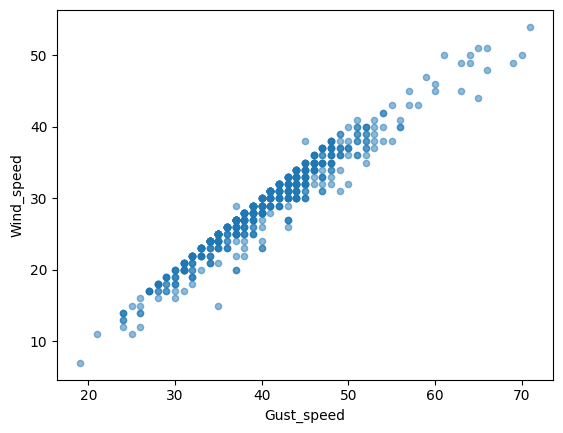

In [6]:
df_airport.plot(kind='scatter', x='Gust_speed', y='Wind_speed', alpha=0.5)
plt.show()

Fjerner alle verdier med NaN

In [7]:
df_clean = df_airport[['Wind_direction', 'Wind_speed', 'Gust_speed', 'Temperature', 'Dewpoint', 'QNH']].dropna()

Vi ser en tydelig sammenheng mellom datatypene

Trener modellen

In [8]:
# Test train split for å lage en modell
X_train, X_test, y_train, y_test = train_test_split(df_clean[['Wind_speed']], df_clean['Gust_speed'])


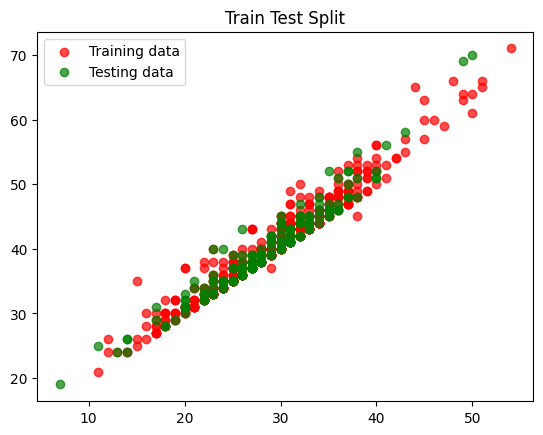

In [9]:
# Test train split visualisering
plt.scatter(X_train, y_train, color='r', label='Training data', alpha=0.7)
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.title('Train Test Split')
plt.show()

In [10]:
# Lager en lineær regresjonsmodell og trener den
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

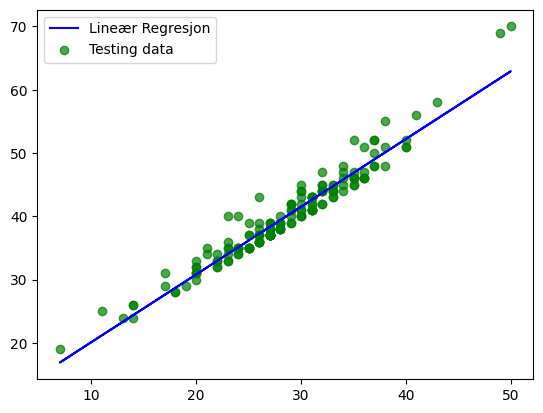

In [11]:
# Bruker modellen til å prediktere test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plotter prediksjonslinje mot test data
plt.plot(X_test, prediction, label='Lineær Regresjon', color='b')
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.show()

In [12]:
# tester modellen for et spesifikk gust_speed
test_value = 35
predicted_35_wind_speed = LR.predict(([[test_value]]))
print(f"Tester for wind_speed på {test_value} knop og får predikert Gust_speed på {predicted_35_wind_speed.round(2)} knop.")

Tester for wind_speed på 35 knop og får predikert Gust_speed på [46.87] knop.


In [13]:
# Gir modellen en score
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.9358069456879147

Dette er en veldig god prediksjon, da den høyeste mulige scoren er 1, altså 100%. Denne modellen treffer på 96%, noe vi anser som veldig bra.

#### Videre prediksjon av QNH basert på flere variabler

Trener modellen

In [14]:
# Test train split for å lage en modell
X_train, X_test, y_train, y_test = train_test_split(df_clean['QNH'], df_clean[['Wind_speed']])

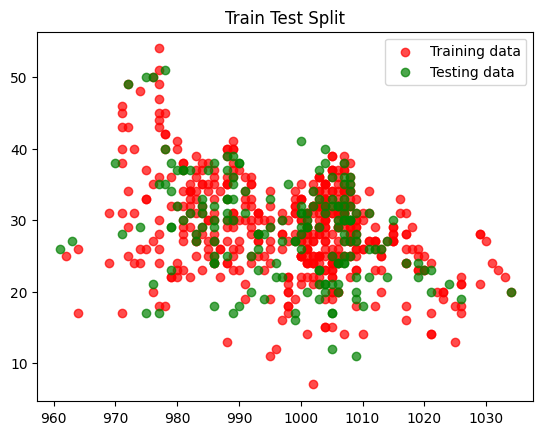

In [15]:
# Test train split visualisering
plt.scatter(X_train, y_train, color='r', label='Training data', alpha=0.7)
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.title('Train Test Split')
plt.show()

In [16]:
# Lager en lineær regresjonsmodell og trener den
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

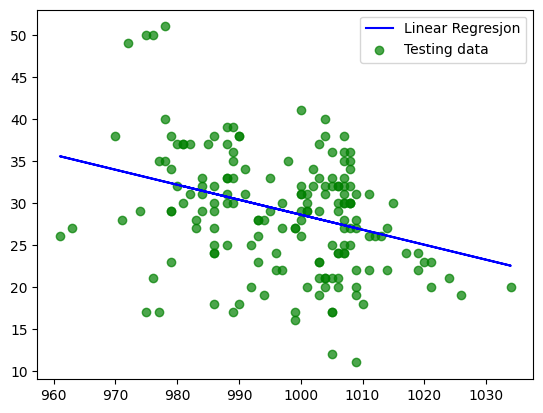

In [17]:
# Bruker modellen til å predikere test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plotter prediksjonslinje mot test data
plt.plot(X_test, prediction, label='Linear Regresjon', color='b')
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.show()

Også framstilt i søyle og linjediagram

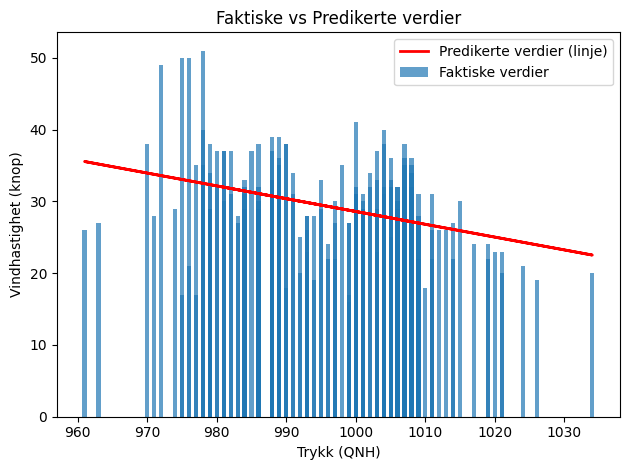

In [18]:
# Bruker modellen til å predikere test data
prediction = LR.predict(X_test.values.reshape(-1, 1))

X_values = X_test.values.flatten()
y_values = y_test.values.flatten()

# Plotter faktiske verdier som søyler med QNH som x-akse
plt.bar(X_values, y_values, width=0.6, label='Faktiske verdier', alpha=0.7)

# Plotter prediksjon som linje
plt.plot(X_values, prediction, color='red', label='Predikerte verdier (linje)', linewidth=2)

plt.xlabel('Trykk (QNH)')
plt.ylabel('Vindhastighet (knop)')
plt.title('Faktiske vs Predikerte verdier')
plt.legend()
plt.tight_layout()
plt.show()

Gir prediksjonen en score

In [19]:
# Gir modellen en score
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.12317704184804368

#### Predikerer vindretning med flere variabler

In [20]:
# Konverterer vindretning til sinus og cosinus
df_clean['Wind_direction_sin'] = np.deg2rad(df_clean['Wind_direction'])
df_clean['Wind_direction_cos'] = np.sin(df_clean['Wind_direction'])
df_clean['Wind_direction_sin'] = np.cos(df_clean['Wind_direction'])

Trener modellen

In [21]:
# Introduserer variablene for å predikere QNH
X = df_clean[['Wind_speed', 'Temperature', 'Dewpoint']]
y_sin = df_clean['Wind_direction_sin']
y_cos = df_clean['Wind_direction_cos']

model_sin = LinearRegression().fit(X, y_sin)
model_cos = LinearRegression().fit(X, y_cos)

In [22]:
# Lager en lineær regresjonsmodell og trener den
y_pred_sin = model_sin.predict(X)
y_pred_cos = model_cos.predict(X)

# Beregner vinkel i randianer
y_pred_angle_rad = np.arctan2(y_pred_sin, y_pred_cos)

# Konverter til grader og gjør en til [0, 360) Konverterer også til integer fra float
y_pred_deg = np.round(np.rad2deg(y_pred_angle_rad) % 360).astype(int)

In [23]:
# Vilkårlig test for å se om det funker
sample_data = df_clean.sample(1)
sample_data

,Wind_direction,Wind_speed,Gust_speed,Temperature,Dewpoint,QNH,Wind_direction_sin,Wind_direction_cos
16439,120,20,31.0,3.0,-4.0,998,0.814181,0.580611


In [24]:
# Henter ut data fra utsnittet.
X_new = pd.DataFrame({
    'Wind_speed': df_clean['Wind_speed'],
    'Temperature': df_clean['Temperature'],
    'Dewpoint': df_clean['Dewpoint']
})


Bergener resultater

In [25]:
# Henter ut faktisk vindretning
actual_dir = sample_data['Wind_direction'].iloc[0]

# Beregner forskjellen med sirkulær vinkelavstand
diff = (actual_dir - y_pred_deg[0] + 180) % 360 - 180
diff = abs(diff)

Resultater av modellen

In [26]:
print(f"Faktisk vindretning: {actual_dir} grader")
print(f"Predikert vindretning: {y_pred_deg[0]} grader")
print(f"Forskjellen mellom predikert og faktisk vindretning: {diff:.2f} grader")

Faktisk vindretning: 120 grader
Predikert vindretning: 193 grader
Forskjellen mellom predikert og faktisk vindretning: 73.00 grader


Vi har tidligere sett at det er liten korrelasjon mellom variablen 'vindretning' og de andre variablene. Dette får vi også bekreftet når vi predikerer vindretningen, og sammenligner den med faktisk vindretning.

#### Predikerer vindhastighet med flere variabler

In [27]:
df_airport = df_airport[['Wind_speed','Temperature','Dewpoint','QNH']].dropna()

In [28]:
X = df_airport[['Temperature', 'Dewpoint', 'QNH']]
y = df_airport['Wind_speed']

In [29]:
# Lager en lineær regresjonsmodell og trener den
model = LinearRegression().fit(X, y)

In [30]:
y_pred = model.predict(X)

In [31]:
# Vilkårlig test for å se om det funker
sample_data = df_airport.sample(1)
sample_data

,Wind_speed,Temperature,Dewpoint,QNH
8678,5,15.0,13.0,1002


In [32]:
# Henter ut én sample-rad som input til prediksjon
x_new = sample_data[['Temperature', 'Dewpoint', 'QNH']]
y_pred = int(model.predict(x_new)[0])

Beregner resultater

In [33]:
# Henter ut faktisk vindretning
y_act = sample_data['Wind_speed'].iloc[0]

# Beregner forskjellen med sirkulær vinkelavstand
diff = (y_act - y_pred)

Skriver ut resultater

In [34]:
print(f"Faktisk vindhastighet: {y_act} knop")
print(f"Predikert vindhastighetg: {y_pred} knop")
print(f"Forskjellen mellom predikert og faktisk vindhastighet: {diff:.2f} knop")

Faktisk vindhastighet: 5 knop
Predikert vindhastighetg: 9 knop
Forskjellen mellom predikert og faktisk vindhastighet: -4.00 knop
